In [69]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [70]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [71]:
X_test.shape

(10000, 28, 28)

In [72]:
y_test.shape

(10000,)

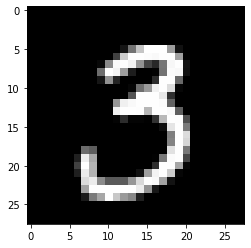

In [73]:
plt.imshow(X_test[90], cmap='gray')

In [74]:
y_test[90]

3

##### So we can see that all the images in the dataset have 28x28 dimension ie. 784 dimensions, so we will not try to reduce these dimensions to 2, and then will try to plot them on a 2-d graph. 

We are using only test data instead of train data as test data have only 10000 images whereas as train data have huge number of images ie 60000 images.

In [75]:
X = X_test.reshape(-1,28*28)
y = y_test

In [76]:
X.shape

(10000, 784)

### Step 1: Preprocessing the data
- Normalizing/Standardizing the data. 
- For this we can use StandardScalar function of SKlearn library

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc = StandardScaler()

In [79]:
X_ = sc.fit_transform(X) # it will normalize the whole X-data and will put it in X_

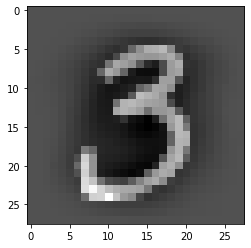

In [80]:
plt.imshow(X_[90].reshape(28,28),cmap="gray")

### Sklearn PCA
- So we will be directly using Scikit learn to implement PCA

In [81]:
from sklearn.decomposition import PCA

In [82]:
pca = PCA(n_components=2) # 'n_componenets' means how many new components or dimension you want to have 

In [83]:
Z_pca = pca.fit_transform(X_)

In [84]:
Z_pca.shape

(10000, 2)

In [85]:
Z_pca
# the first column of 2-d array refers to the principle component 1, whereas the second column signifies principle component 2

array([[-5.45832866,  6.41466888],
       [ 2.80439224, -8.02979447],
       [-7.41124605, -3.86382657],
       ...,
       [-5.00435067,  1.15396375],
       [-1.42085851, -4.42418759],
       [13.14268244, -4.26174754]])

In [86]:
pca.explained_variance_ 
# explained_variance_ tells us that how much variance is explained by each of the principle component/feature in the newly formed dimension/array.
# So here from the output we can see that around 41% of variance is explained by 1st-principle_component/1st-dimension, 
# and around 28% variance is explained by the 2nd -principle_component/2nd-dimension, so in total we get around 41+28 = 69% to 70% of the total variance information. 
# So in short we lost 30% of the variance which means we lost 30% of our information.


array([41.39893397, 28.35105785])

## Custom PCA

In [87]:
import numpy as np

#### Step-2 : Compute covariance matrix

In [88]:
covar = np.dot(X_.T,X_)

In [89]:
covar.shape

(784, 784)

### Step-3: Compute eigen vectors using SVD

In [90]:
from numpy.linalg import svd

In [91]:
U,S,V = svd(covar)

In [92]:
U.shape

(784, 784)

In [93]:
U_reduced = U[: , 0:2]

In [94]:
U_reduced.shape

(784, 2)

### Step-4: Projection of Data on New axis(Components)

In [95]:
Z = np.dot(X_,U_reduced)

In [96]:
Z.shape

(10000, 2)

In [97]:
Z # (so we got same results as we got from sklearn, it just the mirror image of what we get from sklearn, so we get hae same values by simply doing -Z,although the direction of vector doesn't matter)

array([[  5.45831116,  -6.41400668],
       [ -2.80443233,   8.02885014],
       [  7.41124146,   3.86404387],
       ...,
       [  5.00435204,  -1.15364641],
       [  1.42085442,   4.42308066],
       [-13.14268302,   4.26280299]])

#### In this examples we reduced 784 dimension to 2 dimensions, as we also wanted to visualize the data, but generally so much reduction in dimensions is not preffered, as we have to retain around 90-95% of data.

### Visualize Dataset

In [98]:
import pandas as pd

In [99]:
new_dataset = np.hstack((Z,y.reshape(-1,1)))

In [100]:
dataframe = pd.DataFrame(new_dataset, columns=["PC1","PC2","Label"])

In [101]:
dataframe.head()

,PC1,PC2,Label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


<Figure size 1080x1080 with 0 Axes>

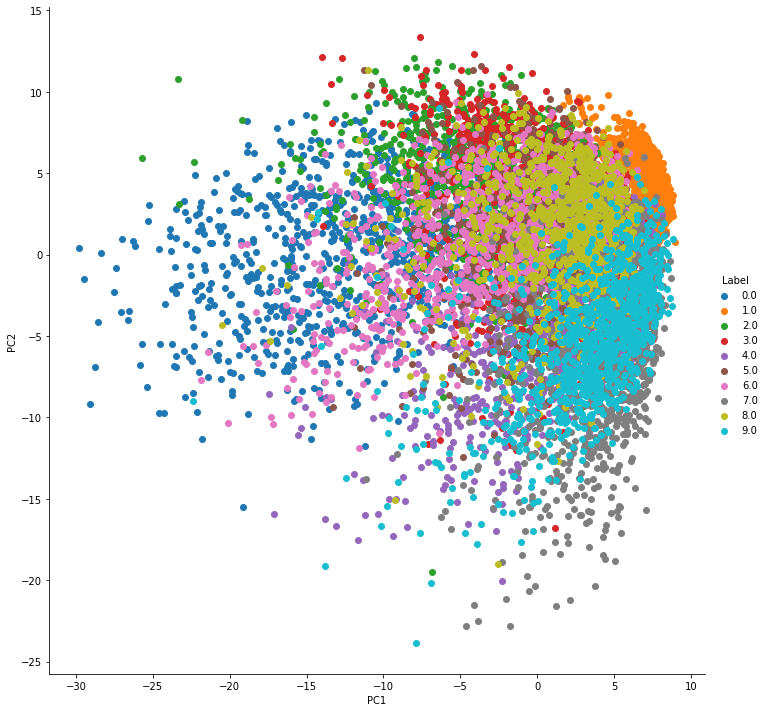

In [103]:
import seaborn as sns
plt.figure(figsize=(15,15))
fg = sns.FacetGrid(dataframe, hue="Label", height=10)
fg.map(plt.scatter,"PC1","PC2")
fg.add_legend()
plt.show()

### So above what we did is one way of how we can visualize our data by first reducing our data to 2D dataset, and then simply applying plt.scatter to get the visulaiztion. 
- We are also getting so much noise in the above visualization because we have reduced the dimension by a large margin ie frm 784 to 2, hence resulting in decrease in information by 30%.That's the reason as why the visualization is so clustered.

## PCA with 784 dimensions

In [104]:
pca = PCA() # if we don't pass attribute n_components, the by default it will take the value of n_components as 784 for our case, which is equal to the number of original dimensions.

In [105]:
Z_pca = pca.fit_transform(X_)

In [106]:
Z_pca.shape

(10000, 784)

In [107]:
pca.explained_variance_

array([4.13989340e+01, 2.83510581e+01, 2.70196465e+01, 2.15824995e+01,
       1.84057252e+01, 1.60945634e+01, 1.36639090e+01, 1.25807315e+01,
       1.11624006e+01, 1.01380790e+01, 9.83450164e+00, 8.75790204e+00,
       8.38544770e+00, 7.97784570e+00, 7.64886637e+00, 7.31512409e+00,
       6.89333872e+00, 6.64082579e+00, 6.32396933e+00, 6.08974669e+00,
       5.94234357e+00, 5.78338241e+00, 5.65926201e+00, 5.48906732e+00,
       5.25427495e+00, 5.14680013e+00, 5.05462485e+00, 4.89770948e+00,
       4.73536524e+00, 4.56603235e+00, 4.46677346e+00, 4.37046128e+00,
       4.32323658e+00, 4.15557409e+00, 4.03609421e+00, 3.95423005e+00,
       3.88875015e+00, 3.82939953e+00, 3.77880871e+00, 3.69226086e+00,
       3.68222396e+00, 3.66141824e+00, 3.56686939e+00, 3.47145867e+00,
       3.42387456e+00, 3.33512759e+00, 3.32686280e+00, 3.26786201e+00,
       3.19850249e+00, 3.13279782e+00, 3.07617536e+00, 3.03401082e+00,
       2.97856834e+00, 2.94000449e+00, 2.89943744e+00, 2.83019996e+00,
      

In [108]:
pca.explained_variance_ratio_ # so in back we are actually getting this ratio by this following formula ie. :- pca.explained_variance_/np.sum(pca.explained_variance_)

array([6.19682546e-02, 4.24374595e-02, 4.04445278e-02, 3.23059001e-02,
       2.75507255e-02, 2.40912485e-02, 2.04529082e-02, 1.88315470e-02,
       1.67085095e-02, 1.51752473e-02, 1.47208356e-02, 1.31093207e-02,
       1.25518101e-02, 1.19416885e-02, 1.14492537e-02, 1.09496895e-02,
       1.03183374e-02, 9.94036184e-03, 9.46607325e-03, 9.11547562e-03,
       8.89483433e-03, 8.65689233e-03, 8.47110191e-03, 8.21634492e-03,
       7.86489450e-03, 7.70402013e-03, 7.56604698e-03, 7.33116722e-03,
       7.08816124e-03, 6.83469424e-03, 6.68611794e-03, 6.54195245e-03,
       6.47126385e-03, 6.22029721e-03, 6.04145299e-03, 5.91891411e-03,
       5.82090011e-03, 5.73206076e-03, 5.65633358e-03, 5.52678388e-03,
       5.51176009e-03, 5.48061691e-03, 5.33909088e-03, 5.19627473e-03,
       5.12504816e-03, 4.99220670e-03, 4.97983549e-03, 4.89151980e-03,
       4.78769856e-03, 4.68934811e-03, 4.60459243e-03, 4.54147817e-03,
       4.45848874e-03, 4.40076420e-03, 4.34004117e-03, 4.23640261e-03,
      

In [109]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

In [110]:
cum_var_explained

array([0.06196825, 0.10440571, 0.14485024, 0.17715614, 0.20470687,
       0.22879812, 0.24925102, 0.26808257, 0.28479108, 0.29996633,
       0.31468716, 0.32779648, 0.34034829, 0.35228998, 0.36373924,
       0.37468893, 0.38500726, 0.39494763, 0.4044137 , 0.41352917,
       0.42242401, 0.4310809 , 0.439552  , 0.44776835, 0.45563324,
       0.46333726, 0.47090331, 0.47823448, 0.48532264, 0.49215733,
       0.49884345, 0.5053854 , 0.51185667, 0.51807696, 0.52411842,
       0.53003733, 0.53585823, 0.54159029, 0.54724663, 0.55277341,
       0.55828517, 0.56376579, 0.56910488, 0.57430115, 0.5794262 ,
       0.58441841, 0.58939824, 0.59428976, 0.59907746, 0.60376681,
       0.6083714 , 0.61291288, 0.61737137, 0.62177213, 0.62611217,
       0.63034858, 0.63454437, 0.63868709, 0.64280317, 0.64685943,
       0.65086596, 0.65473127, 0.65854374, 0.66229743, 0.66596192,
       0.66957285, 0.67314234, 0.6766452 , 0.68011477, 0.68355655,
       0.68691319, 0.69025179, 0.69355391, 0.69682147, 0.70006

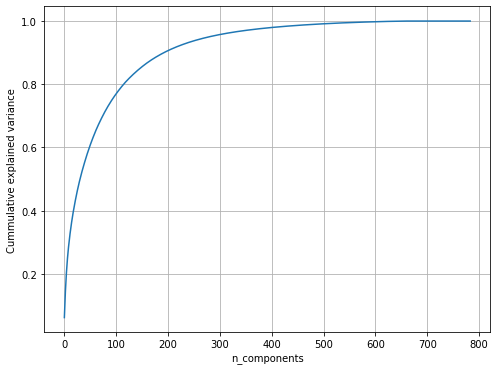

In [112]:
plt.figure(figsize=(8,6))
plt.plot(cum_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cummulative explained variance")
plt.show() 